In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
import seaborn as sns
data = pandas.read_csv('data.csv')

In [ ]:
def sigmoid(z): # Calculates the probability between 0 and 1 
    g = 1/(1+np.exp(-z))
    return g

In [ ]:
def compute_cost_logistic(X, y, w, b): # Calculates the accuracy of the model
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i], w) + b
        f_wb_i = sigmoid(z_i)
        cost += -y[i]*np.log(f_wb_i)-(1-y[i])*np.log(1-f_wb_i)
    
    cost = cost / m
    return cost

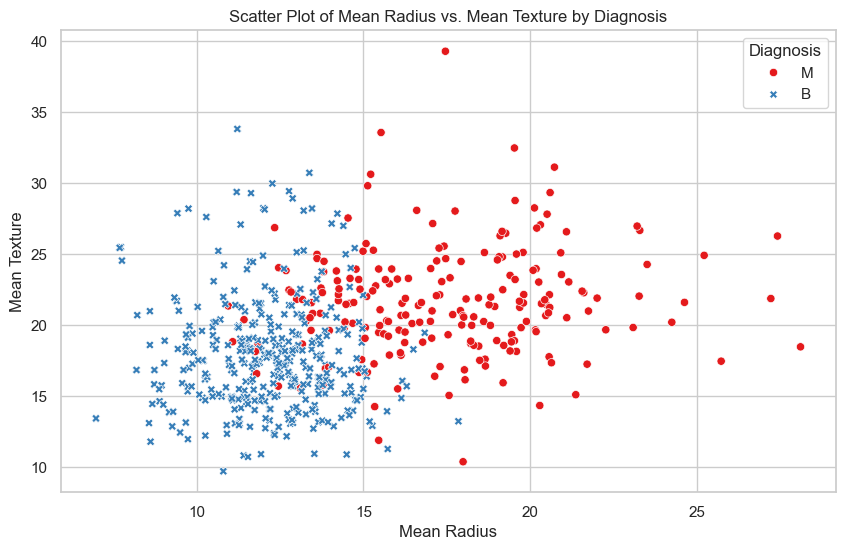

In [2]:
# Setting up the visual style
sns.set_theme(style="whitegrid")

# Create a scatter plot of radius_mean vs texture_mean, colored by diagnosis
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='radius_mean', y='texture_mean', hue='diagnosis', palette='Set1', style='diagnosis')

# Adding titles and labels
plt.title('Scatter Plot of Mean Radius vs. Mean Texture by Diagnosis')
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')

# Show plot
plt.legend(title='Diagnosis')
plt.show()